<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Finding-Shortest-Paths" data-toc-modified-id="Finding-Shortest-Paths-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Finding Shortest Paths</a></span></li><li><span><a href="#Limit-data-to-make-some-things-faster" data-toc-modified-id="Limit-data-to-make-some-things-faster-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Limit data to make some things faster</a></span><ul class="toc-item"><li><span><a href="#Sub-Graph" data-toc-modified-id="Sub-Graph-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sub-Graph</a></span></li><li><span><a href="#Degree-Centrality" data-toc-modified-id="Degree-Centrality-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Degree Centrality</a></span></li><li><span><a href="#Closeness-Centrality" data-toc-modified-id="Closeness-Centrality-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Closeness Centrality</a></span></li><li><span><a href="#Eigenvector-Centrality" data-toc-modified-id="Eigenvector-Centrality-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Eigenvector Centrality</a></span></li><li><span><a href="#Betweenness-centrality" data-toc-modified-id="Betweenness-centrality-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Betweenness centrality</a></span></li></ul></li></ul></div>

In [3]:
import pandas as pd
import networkx as nx
from itertools import combinations

**Download Data from [Kaggle](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset)**

Extract it into `/baconapi/data`

## Finding Shortest Paths

In [4]:
movies = pd.read_csv("baconapi/data/movies.csv")
movies.head(3)

/Users/felipe/miniforge3/envs/ironhack/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0


In [5]:
movies.loc[0,"actors"]

'Blanche Bayliss, William Courtenay, Chauncey Depew'

In [5]:
type(movies.loc[0,"actors"])

str

In [6]:
movies.loc[0,"actors"].split(",")

['Blanche Bayliss', ' William Courtenay', ' Chauncey Depew']

In [7]:
type(movies.loc[0,"actors"].split(","))

list

In [8]:
[actor.strip() for actor in movies.loc[0,"actors"].split(",")]

['Blanche Bayliss', 'William Courtenay', 'Chauncey Depew']

In [9]:
list(map(lambda x: x.strip(), movies.loc[0,"actors"].split(",")))

['Blanche Bayliss', 'William Courtenay', 'Chauncey Depew']

In [10]:
miss_jerry = [actor.strip() for actor in movies.loc[0,"actors"].split(",")]
combinations(miss_jerry,2)

In [11]:
list(combinations(miss_jerry,2))

[('Blanche Bayliss', 'William Courtenay'),
 ('Blanche Bayliss', 'Chauncey Depew'),
 ('William Courtenay', 'Chauncey Depew')]

In [12]:
G = nx.Graph()

In [13]:
G.add_edges_from(combinations(miss_jerry,2))

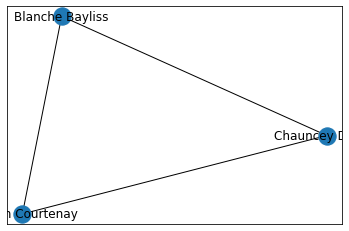

In [14]:
nx.draw_networkx(G)

In [15]:
for ind, row in movies.iloc[:5].iterrows():
    cast = [actor.strip() for actor in row["actors"].split(",")]
    print(cast)

['Blanche Bayliss', 'William Courtenay', 'Chauncey Depew']
['Elizabeth Tait', 'John Tait', 'Norman Campbell', 'Bella Cola', 'Will Coyne', 'Sam Crewes', 'Jack Ennis', 'John Forde', 'Vera Linden', 'Mr. Marshall', 'Mr. McKenzie', 'Frank Mills', 'Ollie Wilson']
['Asta Nielsen', 'Valdemar Psilander', 'Gunnar Helsengreen', 'Emil Albes', 'Hugo Flink', 'Mary Hagen']
['Helen Gardner', 'Pearl Sindelar', 'Miss Fielding', 'Miss Robson', 'Helene Costello', 'Charles Sindelar', 'Mr. Howard', 'James R. Waite', 'Mr. Osborne', 'Harry Knowles', 'Mr. Paul', 'Mr. Brady', 'Mr. Corker']
['Salvatore Papa', 'Arturo Pirovano', 'Giuseppe de Liguoro', 'Pier Delle Vigne', 'Augusto Milla', 'Attilio Motta', 'Emilise Beretta']


In [16]:
for ind, row in movies.iloc[:5].iterrows():
    cast = [actor.strip() for actor in row["actors"].split(",")]
    comb = combinations(cast,2)
    print(comb)
    print(list(comb))
    break

[('Blanche Bayliss', 'William Courtenay'), ('Blanche Bayliss', 'Chauncey Depew'), ('William Courtenay', 'Chauncey Depew')]


In [17]:
G = nx.Graph()
for ind, row in movies.iloc[:5].iterrows():
    cast = [actor.strip() for actor in row["actors"].split(",")]
    comb = combinations(cast,2)
    G.add_edges_from(comb)

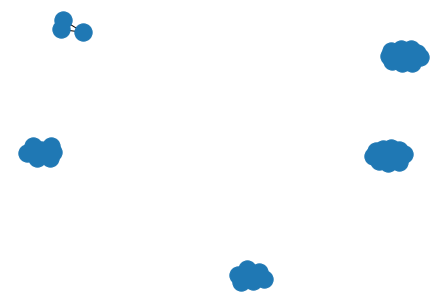

In [18]:
nx.draw(G)

In [19]:
G = nx.Graph()
for ind, row in movies.iterrows():
    cast = [actor.strip() for actor in row["actors"].split(",")]
    comb = combinations(cast,2)
    G.add_edges_from(comb)

AttributeError: 'float' object has no attribute 'split'

There is some value in `row["actors"]` that is a float, not a string.

Let's clean the df and keep only those rows in which this column contains a string

In [20]:
type(movies["actors"])

pandas.core.series.Series

In [21]:
movies["actors"].apply(lambda x: type(x)).head()

0    <class 'str'>
1    <class 'str'>
2    <class 'str'>
3    <class 'str'>
4    <class 'str'>
Name: actors, dtype: object

In [22]:
movies["actors"].apply(lambda x: type(x) == str).head()

0    True
1    True
2    True
3    True
4    True
Name: actors, dtype: bool

In [6]:
movies = movies[movies["actors"].apply(lambda x: type(x) == str)]

In [24]:
G = nx.Graph()
for ind, row in movies.iterrows():
    cast = [actor.strip() for actor in row["actors"].split(",")]
    comb = combinations(cast,2)
    G.add_edges_from(comb)

In [25]:
actors = G.nodes

In [26]:
len(actors)

417285

In [27]:
connections = G.edges

In [28]:
len(connections)

7086770

In [29]:
G.has_edge("Penélope Cruz", "Michael Keaton")

False

In [30]:
G.has_edge("Penélope Cruz", "Antonio Banderas")

True

We have the connections, but no information on this connection. In which movie were they together?

In [ ]:
G = nx.Graph()
for ind, row in movies.iterrows():
    cast = [actor.strip() for actor in row["actors"].split(",")]
    comb = list(combinations(cast,2))
    G.add_edges_from(comb)
    ## Add an attribute to an edge
    for pair in comb:
        G.edges[pair]["movies"] = row["original_title"]
        print(G.edges[pair])
    break

**A pair of actors may have done more than one movie together!**

In [ ]:
G = nx.Graph()
for ind, row in movies.iterrows():
    cast = [actor.strip() for actor in row["actors"].split(",")]
    comb = list(combinations(cast,2))
    G.add_edges_from(comb)
    ## Add an attribute to an edge
    for pair in comb:
        ## We will make it so that "movies" be a list
        if "movies" not in G.edges[pair].keys():
            G.edges[pair]["movies"] = []
        G.edges[pair]["movies"].append(row["original_title"])

In [7]:
## Refactor
G = nx.Graph()
for ind, row in movies.iterrows():
    cast = map(lambda x: x.strip(), row["actors"].split(","))
    comb = list(combinations(cast,2))
    G.add_edges_from(comb)
    ## Add an attribute to an edge
    for pair in comb:
        ## We will make it so that "movies" be a list
        G.edges[pair]["movies"] = G.edges[pair].get("movies",[]) + [row["original_title"]]

In [11]:
G.has_edge("Penélope Cruz", "Antonio Banderas")

True

In [12]:
G.get_edge_data("Penélope Cruz", "Antonio Banderas")

{'movies': ['Los amantes pasajeros', 'Dolor y gloria']}

In [13]:
G.edges[("Penélope Cruz", "Antonio Banderas")]

{'movies': ['Los amantes pasajeros', 'Dolor y gloria']}

In [14]:
G.has_edge("Penélope Cruz", "Michael Keaton")

False

In [27]:
nx.shortest_path(G,"Penélope Cruz", "Michael Keaton")

['Penélope Cruz', 'Danny DeVito', 'Michael Keaton']

In [19]:
G.get_edge_data("Penélope Cruz", 'Danny DeVito')

{'movies': ['The Good Night']}

In [20]:
G.get_edge_data('Danny DeVito', "Michael Keaton")

{'movies': ['Johnny Dangerously', 'Batman Returns', 'Dumbo']}

In [22]:
list(nx.all_shortest_paths(G,"Penélope Cruz", "Michael Keaton"))

[['Penélope Cruz', 'Billy Crudup', 'Michael Keaton'],
 ['Penélope Cruz', 'Cole Hauser', 'Michael Keaton'],
 ['Penélope Cruz', 'John de Lancie', 'Michael Keaton'],
 ['Penélope Cruz', 'Jason Lee', 'Michael Keaton'],
 ['Penélope Cruz', 'Shalom Harlow', 'Michael Keaton'],
 ['Penélope Cruz', 'Cheech Marin', 'Michael Keaton'],
 ['Penélope Cruz', 'Robert Downey Jr.', 'Michael Keaton'],
 ['Penélope Cruz', 'John Carroll Lynch', 'Michael Keaton'],
 ['Penélope Cruz', 'Dorian Harewood', 'Michael Keaton'],
 ['Penélope Cruz', 'Alan Arkin', 'Michael Keaton'],
 ['Penélope Cruz', 'Danny DeVito', 'Michael Keaton'],
 ['Penélope Cruz', 'Gwyneth Paltrow', 'Michael Keaton'],
 ['Penélope Cruz', 'Nicole Kidman', 'Michael Keaton'],
 ['Penélope Cruz', 'Ben Kingsley', 'Michael Keaton'],
 ['Penélope Cruz', 'Geoffrey Rush', 'Michael Keaton'],
 ['Penélope Cruz', 'Owen Wilson', 'Michael Keaton'],
 ['Penélope Cruz', 'Will Ferrell', 'Michael Keaton'],
 ['Penélope Cruz', 'Tony Plana', 'Michael Keaton']]

In [28]:
list(nx.all_shortest_paths(G,"Charles Chaplin", "Santiago Segura"))

[['Charles Chaplin', 'Javier Bardem', 'Santiago Segura']]

In [29]:
G.get_edge_data('Charles Chaplin', 'Javier Bardem')

{'movies': ['Final Cut: Hölgyeim és uraim']}

In [32]:
list(nx.all_shortest_paths(G,'Brad Pitt', 'Alexis Bledel'))

[['Brad Pitt', 'James Gandolfini', 'Alexis Bledel'],
 ['Brad Pitt', 'Benicio Del Toro', 'Alexis Bledel'],
 ['Brad Pitt', 'J.K. Simmons', 'Alexis Bledel'],
 ['Brad Pitt', 'Marianne Jean-Baptiste', 'Alexis Bledel'],
 ['Brad Pitt', 'James Badge Dale', 'Alexis Bledel'],
 ['Brad Pitt', 'Robin Wright', 'Alexis Bledel']]

In [33]:
G.get_edge_data('Brad Pitt', 'Robin Wright')

{'movies': ['Moneyball']}

In [34]:
G.get_edge_data('Robin Wright', 'Alexis Bledel')

{'movies': ['The Conspirator']}

In [38]:
list(nx.all_neighbors(G,"Robin Williams"))[:5]

['Shelley Duvall',
 'Ray Walston',
 'Paul Dooley',
 'Paul L. Smith',
 'Richard Libertini']

In [ ]:
#from networkx.readwrite import json_graph
# This generates an almost 1GB JSON file with all the data on the graph
#data = json_graph.adjacency_data(G)

## Limit data to make some things faster

### Sub-Graph

In [83]:
actors = list(nx.all_shortest_paths(G,"Penélope Cruz", "Michael Keaton"))

In [93]:
lst = [[1,2,3],[4,5],[6],[7,8,9]]

In [94]:
[num for sub_list in lst for num in sub_list]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [84]:
# Flatten
actors = [act for film in actors for act in film]

In [85]:
actors = set(actors)

In [86]:
sub_graph_cruz_keaton = G.subgraph(actors)

In [87]:
colors = {actor:"red" if actor in ["Penélope Cruz", "Michael Keaton"] else "lightpink" for actor in actors}

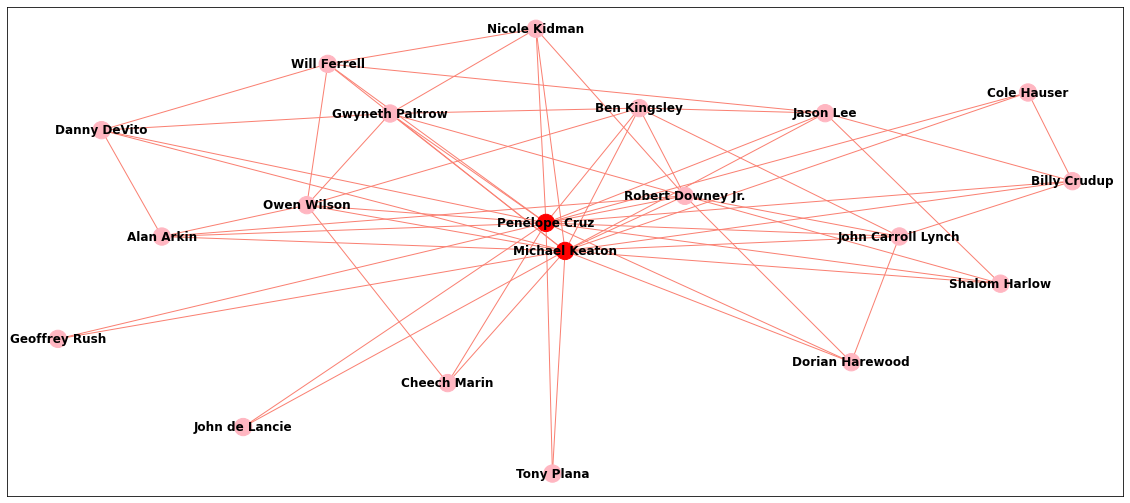

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
nx.draw_networkx(sub_graph_cruz_keaton, edge_color="salmon", node_color=colors.values(), font_weight="bold")

In [96]:
actors_2 = [
 'Ben Kingsley',
 'Danny DeVito',
 'Gwyneth Paltrow',
 'Michael Keaton',
 'Nicole Kidman',
 'Owen Wilson',
 'Penélope Cruz',
 'Robert Downey Jr.',
 'Will Ferrell']

In [97]:
sub_graph_cruz_keaton = G.subgraph(actors_2)

In [102]:
colors = ["red" if actor in ["Penélope Cruz", "Michael Keaton"] else "salmon" for actor in sub_graph_cruz_keaton.nodes]

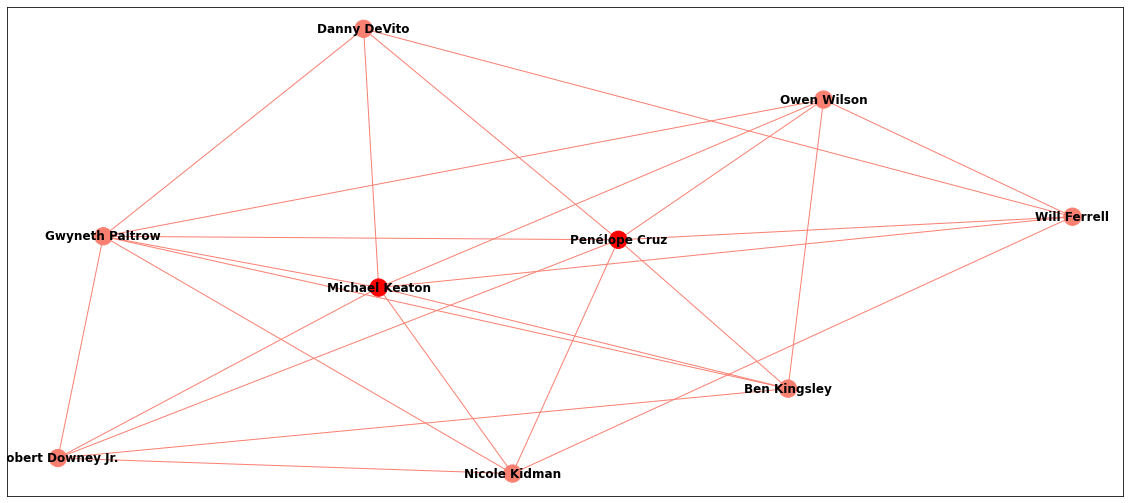

In [104]:
plt.figure(figsize=(20,9))
nx.draw_networkx(sub_graph_cruz_keaton, edge_color="salmon", node_color=colors, font_weight="bold")

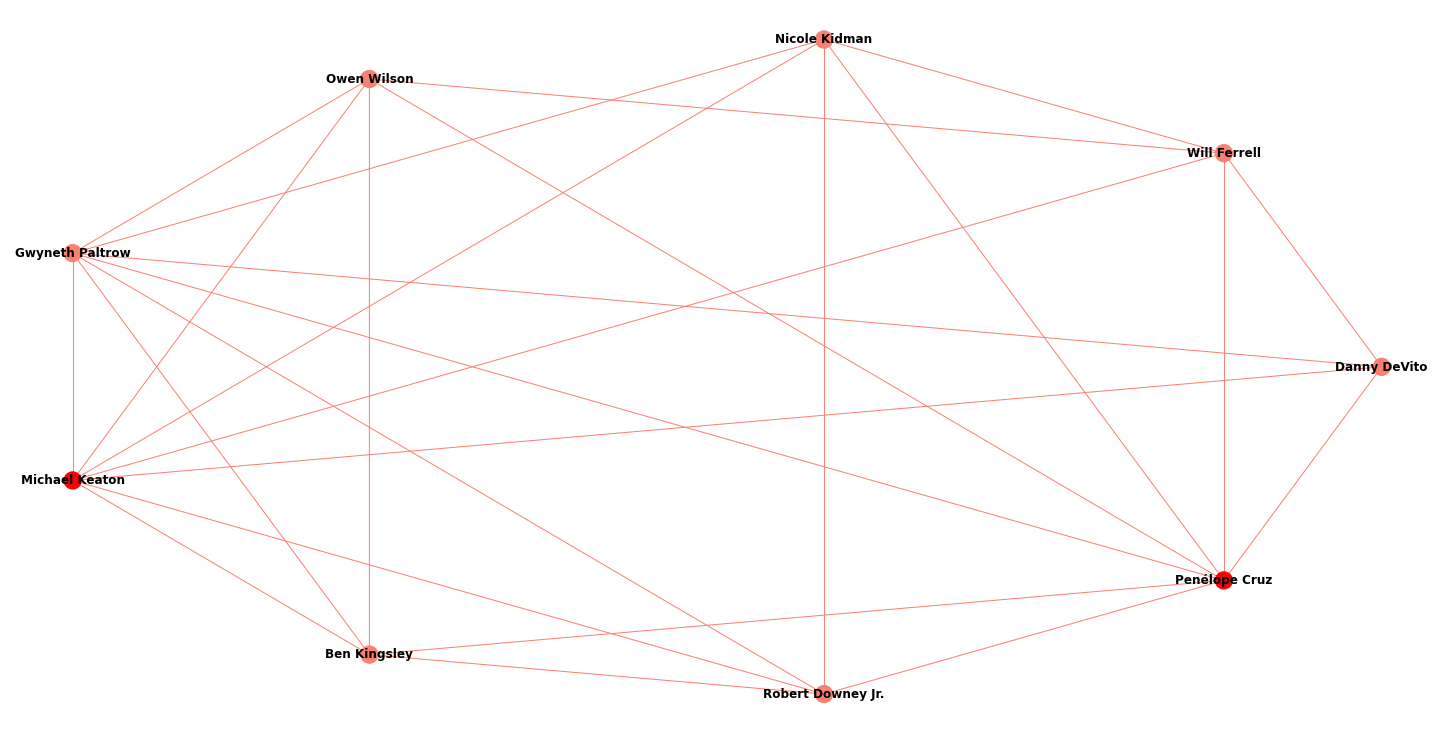

In [112]:
plt.figure(figsize=(20,10))
nx.draw_circular(sub_graph_cruz_keaton, with_labels=True, edge_color="salmon", node_color=colors, font_weight="bold")

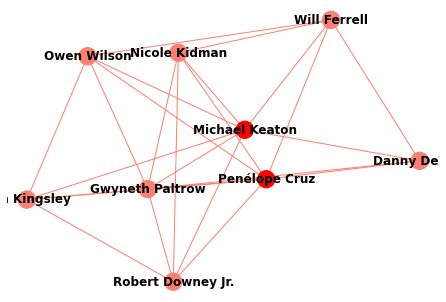

In [114]:
nx.draw_kamada_kawai(sub_graph_cruz_keaton,with_labels=True, edge_color="salmon", node_color=colors, font_weight="bold")

In [132]:
positions = {"Penélope Cruz":(0,5),"Michael Keaton":(20,5)}
for i,actor in enumerate(actors_2):
    positions[actor] = (10+i*(i%2 or -1),i)
positions.update({"Penélope Cruz":(0,5),"Michael Keaton":(20,5)})

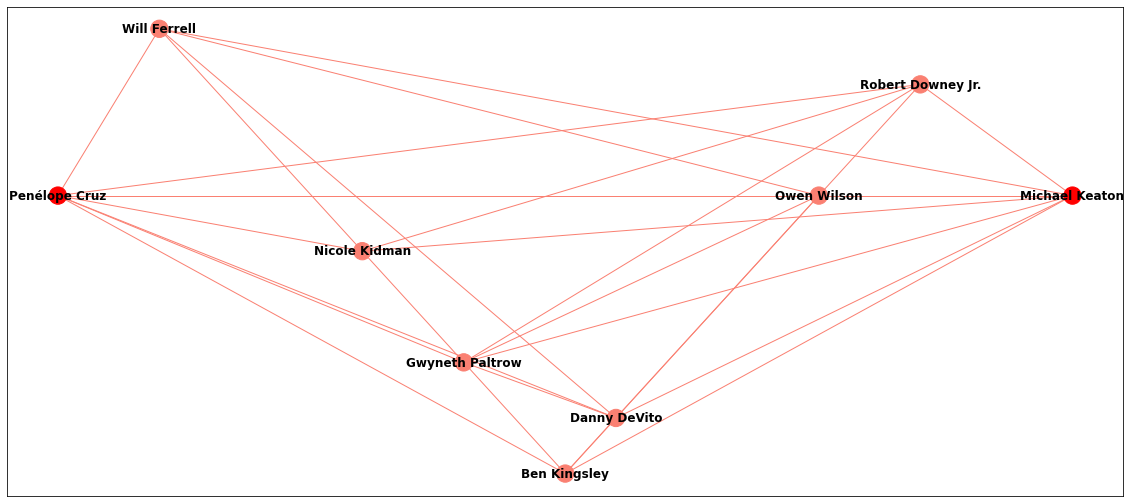

In [133]:
plt.figure(figsize=(20,9))
nx.draw_networkx(sub_graph_cruz_keaton, pos=positions, edge_color="salmon", node_color=colors, font_weight="bold")

In [134]:
movies.shape

(85786, 22)

In [135]:
movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [136]:
select_movies = movies.sort_values(by="votes",ascending=False).iloc[:500]

In [137]:
select_movies.shape

(500, 22)

In [138]:
G = nx.Graph()
for i, row in select_movies.iterrows():
    pairs = list(combinations(map(lambda x:x.strip(),row["actors"].split(",")),2))
    G.add_edges_from(pairs)
    for pair in pairs:
        G.edges[pair]["movie"] = G.edges[pair].get("movie",[]) + [row["original_title"]]

In [139]:
actors = G.nodes()
len(actors)

4955

In [141]:
conn = G.edges()
len(conn)

49145

### Degree Centrality

Degree centrality
Historically first and conceptually simplest is degree centrality, which is defined as the number of links incident upon a node (i.e., the number of ties that a node has).

```python
nx.degree_centrality(G).items()
````

In [144]:
degree = [{k:v} for k,v in nx.degree_centrality(G).items()]
#degree

In [150]:
## The degree of centrality is the number of connections of a given node!
len(list(G.neighbors("Samuel L. Jackson")))

213

In [154]:
## The standardized degree of centrality is the number of connections over the total
## number of nodes - 1.
213/(len(G.nodes)-1)

0.04299555914412596

In [155]:
sorted(degree,key= lambda x: list(x.values())[0], reverse=True)[:5]

[{'Samuel L. Jackson': 0.04299555914412596},
 {'Brad Pitt': 0.039765845781186915},
 {'Leonardo DiCaprio': 0.03552684699232943},
 {'Robert De Niro': 0.03391199031085991},
 {'Morgan Freeman': 0.03330641905530884}]

In [156]:
[(i,c) for i,c in enumerate(degree) if "Kevin Bacon" in c]

[(1475, {'Kevin Bacon': 0.008477997577714978})]

In [158]:
len(list(G.neighbors("Kevin Bacon")))

42

### Closeness Centrality
In a connected graph, the normalized closeness centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.

$$C(x)= \frac{1}{\sum_y d(y,x)}$$

In [160]:
closeness = [{k:v} for k,v in nx.closeness_centrality(G).items()]

In [161]:
sorted(closeness,key= lambda x: list(x.values())[0], reverse=True)[:5]

[{'Leonardo DiCaprio': 0.3919950376618461},
 {'Samuel L. Jackson': 0.3840608184797782},
 {'Brad Pitt': 0.38318866090334397},
 {'Mark Ruffalo': 0.3760519093392416},
 {'Morgan Freeman': 0.3712356556091955}]

In [162]:
[(i,c) for i,c in enumerate(closeness) if "Kevin Bacon" in c]

[(1475, {'Kevin Bacon': 0.32519211156571215})]

### Eigenvector Centrality
Eigenvector centrality (also called eigencentrality) is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. Google's PageRank and the Katz centrality are variants of the eigenvector centrality.

For a given graph $G:=(V,E)$ with $|V|$ number of vertices let $A = (a_{v,t})$ be the [[adjacency matrix]], i.e. $a_{v,t} = 1$ if vertex $v$ is linked to vertex $t$, and $a_{v,t} = 0$ otherwise. The relative centrality score of vertex $v$ can be defined:

$$x_v = \frac{1}{\lambda} \sum_{t \in M(v)}x_t = \frac{1}{\lambda} \sum_{t \in G} a_{v,t}x_t$$

where $M(v)$ is a set of the neighbors of $v$ and $\lambda$ is a constant. With a small rearrangement this can be rewritten in vector notation as the eigenvector equation

$$\mathbf{Ax} = {\lambda}\mathbf{x}$$

In [166]:
eigenvector = [{k:v} for k,v in nx.eigenvector_centrality(G).items()]

In [168]:
sorted(eigenvector,key= lambda x: list(x.values())[0], reverse=True)[:5]

[{'Samuel L. Jackson': 0.16475680771773973},
 {'Robert Downey Jr.': 0.13460346653124758},
 {'Mark Ruffalo': 0.12832559324170623},
 {'Leonardo DiCaprio': 0.11492679704781776},
 {'Jeremy Renner': 0.11305484439630206}]

In [169]:
[(i,c) for i,c in enumerate(eigenvector) if "Kevin Bacon" in c]

[(1475, {'Kevin Bacon': 0.02135127045310364})]

### Betweenness centrality

Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. 

The betweenness of a vertex <math>v</math> in a graph <math>G:=(V,E)</math> with <math>V</math> vertices is computed as follows:

* For each pair of vertices $(s,t)$, compute the shortest paths between them.
* For each pair of vertices $(s,t)$, determine the fraction of shortest paths that pass through the vertex in question (here, vertex $v$).
* Sum this fraction over all pairs of vertices $(s,t)$.

In [ ]:
# Takes forever...
betweenness = [{k:v} for k,v in nx.betweenness_centrality(G).items()]
sorted(betweenness,key= lambda x: list(x.values())[0], reverse=True)

In [ ]:
[(i,c) for i,c in enumerate(betweenness) if "Kevin Bacon" in c]

In [170]:
florence = nx.florentine_families_graph()

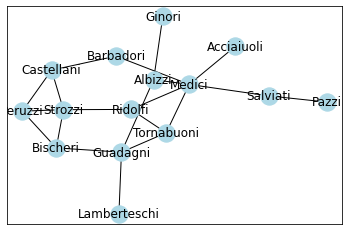

In [175]:
nx.draw_networkx(florence, node_color="lightblue")

In [178]:
betweenness = [{k:v} for k,v in nx.betweenness_centrality(florence).items()]
sorted(betweenness,key= lambda x: list(x.values())[0], reverse=True)

[{'Medici': 0.521978021978022},
 {'Guadagni': 0.2545787545787546},
 {'Albizzi': 0.21245421245421245},
 {'Salviati': 0.14285714285714288},
 {'Ridolfi': 0.11355311355311355},
 {'Bischeri': 0.1043956043956044},
 {'Strozzi': 0.10256410256410257},
 {'Barbadori': 0.09340659340659341},
 {'Tornabuoni': 0.09157509157509157},
 {'Castellani': 0.05494505494505495},
 {'Peruzzi': 0.02197802197802198},
 {'Acciaiuoli': 0.0},
 {'Pazzi': 0.0},
 {'Ginori': 0.0},
 {'Lamberteschi': 0.0}]

In [179]:
degree = [{k:v} for k,v in nx.degree_centrality(florence).items()]
sorted(degree,key= lambda x: list(x.values())[0], reverse=True)

[{'Medici': 0.42857142857142855},
 {'Strozzi': 0.2857142857142857},
 {'Guadagni': 0.2857142857142857},
 {'Castellani': 0.21428571428571427},
 {'Peruzzi': 0.21428571428571427},
 {'Ridolfi': 0.21428571428571427},
 {'Tornabuoni': 0.21428571428571427},
 {'Albizzi': 0.21428571428571427},
 {'Bischeri': 0.21428571428571427},
 {'Barbadori': 0.14285714285714285},
 {'Salviati': 0.14285714285714285},
 {'Acciaiuoli': 0.07142857142857142},
 {'Pazzi': 0.07142857142857142},
 {'Ginori': 0.07142857142857142},
 {'Lamberteschi': 0.07142857142857142}]

In [180]:
closeness = [{k:v} for k,v in nx.closeness_centrality(florence).items()]
sorted(closeness,key= lambda x: list(x.values())[0], reverse=True)

[{'Medici': 0.56},
 {'Ridolfi': 0.5},
 {'Tornabuoni': 0.4827586206896552},
 {'Albizzi': 0.4827586206896552},
 {'Guadagni': 0.4666666666666667},
 {'Strozzi': 0.4375},
 {'Barbadori': 0.4375},
 {'Bischeri': 0.4},
 {'Castellani': 0.3888888888888889},
 {'Salviati': 0.3888888888888889},
 {'Acciaiuoli': 0.3684210526315789},
 {'Peruzzi': 0.3684210526315789},
 {'Ginori': 0.3333333333333333},
 {'Lamberteschi': 0.32558139534883723},
 {'Pazzi': 0.2857142857142857}]

In [181]:
eigenvector = [{k:v} for k,v in nx.eigenvector_centrality(florence).items()]
sorted(eigenvector,key= lambda x: list(x.values())[0], reverse=True)

[{'Medici': 0.4303154258349923},
 {'Strozzi': 0.3559730326460451},
 {'Ridolfi': 0.3415544259074365},
 {'Tornabuoni': 0.325846704169574},
 {'Guadagni': 0.2891171573226501},
 {'Bischeri': 0.2827943958713356},
 {'Peruzzi': 0.2757224374104833},
 {'Castellani': 0.2590200378423514},
 {'Albizzi': 0.2439605296754477},
 {'Barbadori': 0.2117057470647985},
 {'Salviati': 0.14592084164171834},
 {'Acciaiuoli': 0.1321573195285342},
 {'Lamberteschi': 0.08879253113499548},
 {'Ginori': 0.0749245316027793},
 {'Pazzi': 0.044814939703863084}]